**Connect Drive & Colab**

In [1]:
from google.colab import drive                                                  
drive.mount('/content/drive')

Mounted at /content/drive


**Load Dataset**

In [2]:
import pandas as pd                                                            
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/My Drive/dataset/indiabetes.csv')              
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


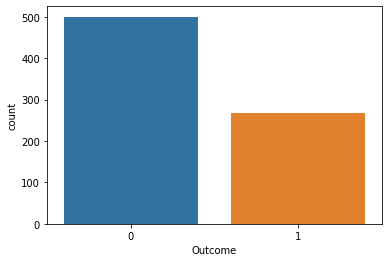

In [7]:
sns.countplot(data['Outcome'])

**Exploratory Data Analysis** 

Pregnancies

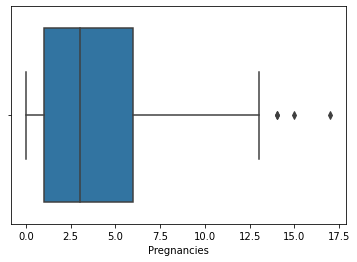

In [8]:
sns.boxplot(x=data['Pregnancies'])

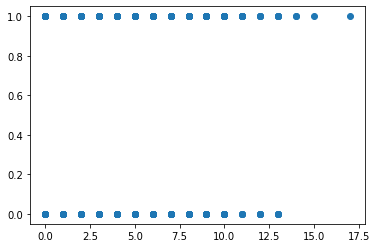

In [9]:
plt.scatter(data['Pregnancies'],data['Outcome'])

In [10]:
max_threshold=data['Pregnancies'].quantile(.95)
print(max_threshold)

10.0


In [15]:
data1=data[data.Pregnancies<=10]                                                  # hapus data outliers
data1['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
Name: Pregnancies, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


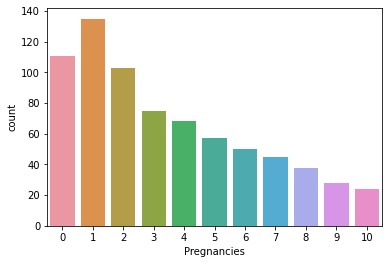

In [16]:
sns.countplot('Pregnancies',data=data1)

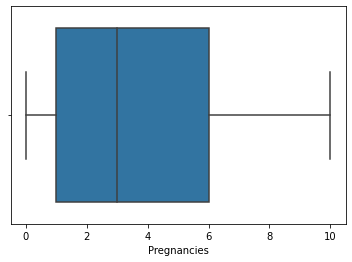

In [17]:
sns.boxplot(x=data1['Pregnancies'])

BloodPressure

In [18]:
(data1['BloodPressure']==0).sum()

33

In [19]:
data1['BloodPressure'].median()

72.0

In [20]:
data1['BloodPressure'].replace(to_replace=0,value=72,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


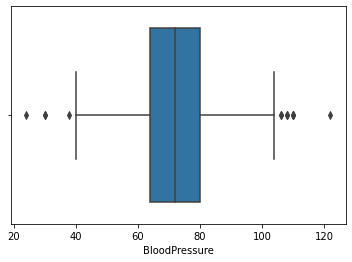

In [21]:
sns.boxplot(x=data1['BloodPressure'])

In [23]:
data2=data1[data1.BloodPressure>40]                                              
data3=data2[data2.BloodPressure<=100]                                             

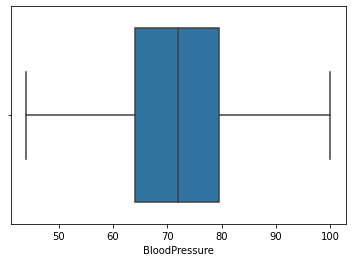

In [24]:
sns.boxplot(x=data3['BloodPressure'])

In [25]:
data3.shape

(718, 9)

Glucose

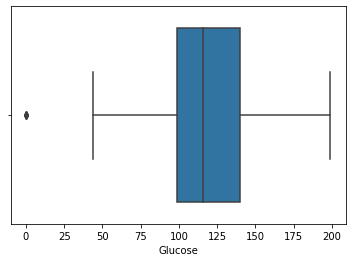

In [26]:
sns.boxplot(x=data3['Glucose'])

In [27]:
data4=data3[data3.Glucose>50]

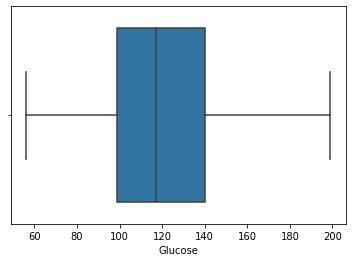

In [28]:
sns.boxplot(x=data4['Glucose'])

In [29]:
data4.shape

(712, 9)

Insulin

In [30]:
(data4['Insulin']==0).sum()

345

In [31]:
data5 = data4.drop('Insulin', axis=1)
data5.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
5,5,116,74,0,25.6,0.201,30,0


BMI

In [33]:
(data5['BMI']==0).sum()

11

In [34]:
data5['BMI'].median()

31.95

In [35]:
data5['BMI'].replace(to_replace=0,value=31.95,inplace=True)

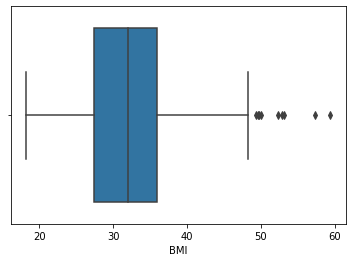

In [36]:
sns.boxplot(x=data5['BMI'])

In [37]:
data6=data5[data5.BMI<45]

Skinthicknes

In [38]:
(data6['SkinThickness']==0).value_counts()

False    477
True     206
Name: SkinThickness, dtype: int64

In [39]:
data6['SkinThickness'].median()

22.0

In [40]:
data4['SkinThickness'].replace(to_replace=0,value=22,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


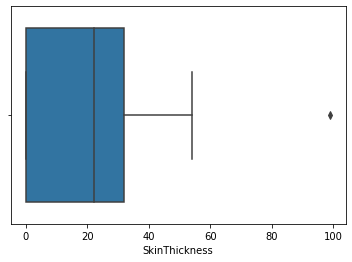

In [41]:
sns.boxplot(x=data6['SkinThickness'])

In [42]:
data7=data6[data6.SkinThickness<50]

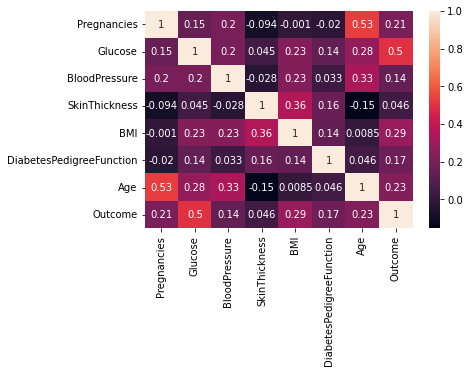

In [43]:
sns.heatmap(data7.corr(),annot=True)

**Split Data**

In [44]:
Var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Kelas = ['Outcome']

In [46]:
x = data7[Var]
y = data7[Kelas]

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y ,train_size=0.7)

print('Data Training = ', len(x_train))
print('Data Testing = ', len(x_test))

Data Training =  473
Data Testing =  203


**Adabost Model**

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

clf = AdaBoostClassifier(random_state=1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print('Accuracy: {}'.format(accuracy_score(y_pred, y_test)))

Accuracy: 0.7783251231527094


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test, y_pred) 

array([[122,  21],
       [ 24,  36]])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       143
           1       0.63      0.60      0.62        60

    accuracy                           0.78       203
   macro avg       0.73      0.73      0.73       203
weighted avg       0.78      0.78      0.78       203

